## Question 2A
Take grayscale image of size $512\times512$ and perform the brightness enhancement of a specific range of gray levels and observe its result.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def getHistrogram(image):
    # process image intensity
    max_intensity = np.max(image)
    min_intensity = np.min(image)
    if min_intensity>=0 and max_intensity<=1:
        image = image*255
    rounded_image = np.round(image)
    integer_image = rounded_image.astype(np.uint8)
    
    # make histrogram
    histrogram = np.zeros(256, dtype='uint8')
    height, width = integer_image.shape
    
    for x in range(height):
        for y in range(width):
            histrogram[integer_image[x, y]] += 1

    return histrogram, np.arange(256)

In [10]:
def enhance_brightness(input, min, max):
    mask = (input >= min) & (input <= max)
    enhancement_factor = 2  # You can adjust this factor as needed
    output = np.copy(input)
    output[mask] = np.clip(input[mask] * enhancement_factor, 0, 255)
    return output

In [20]:
original_image = plt.imread("peppers2.tif")
transformed_image = enhance_brightness(original_image, 0, 100)
hist_original_image, oy = getHistrogram(original_image)
hist_transformed_image, ty = getHistrogram(transformed_image)

<BarContainer object of 256 artists>

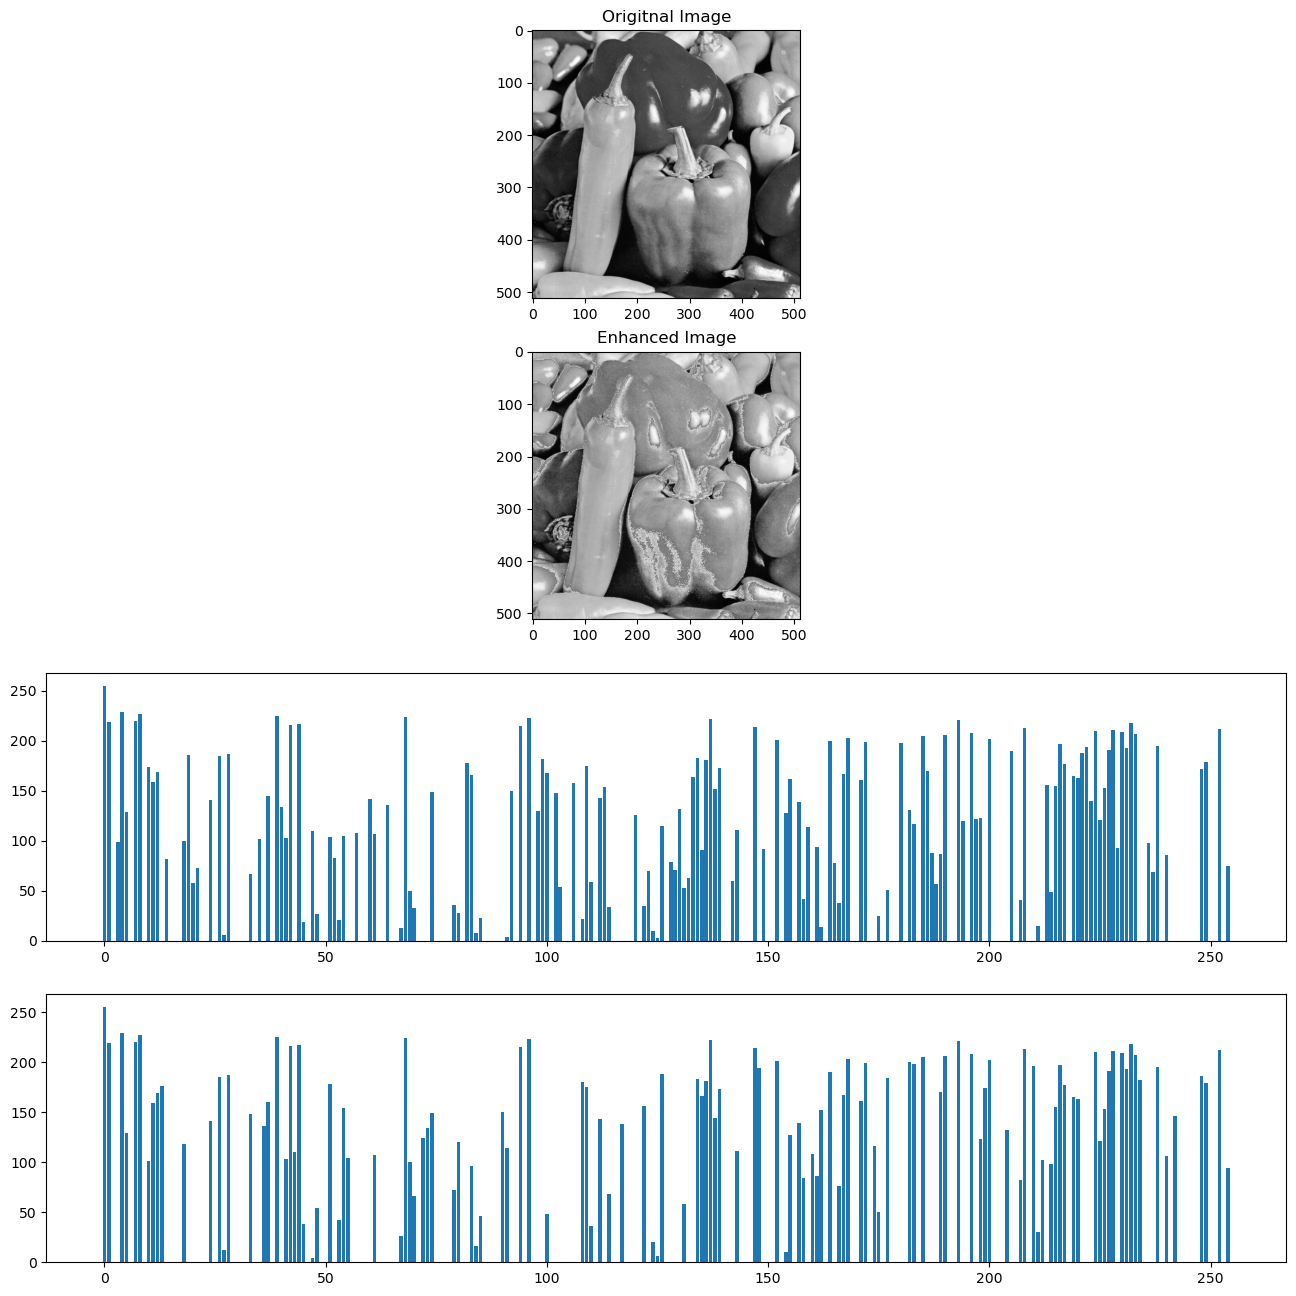

In [22]:
# plotting images
plt.figure(figsize=(16, 16))

plt.subplot(411)
plt.imshow(original_image, cmap="gray")
plt.title("Origitnal Image")

plt.subplot(412)
plt.imshow(transformed_image, cmap="gray")
plt.title("Enhanced Image")

plt.subplot(413)
plt.bar(hist_original_image, oy)

plt.subplot(414)
plt.bar(hist_transformed_image, ty)